# Population française par département en 2015



* INSEE, population 2015 : https://www.insee.fr/fr/statistiques/3635065?sommaire=2414232&q=population+2015#consulter
* INSEE, population 2017 : https://www.insee.fr/fr/statistiques/4515565?sommaire=4516122#consulter
  * Dictionnaire des variables


* https://fr.wikipedia.org/wiki/S%C3%A9rie_statistique
* https://fr.wikipedia.org/wiki/Indicateur_de_dispersion
* https://www.pluralsight.com/guides/interpreting-data-using-descriptive-statistics-python





In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pprint
import csv
import ast

from collections import Counter
from operator import itemgetter

import sqlite3 as sql
import time

from importlib import reload
from shutil import copyfile

In [3]:
data = pd.read_csv("donnees/base-pop-2015-reduite.csv")
departements = pd.read_excel("donnees/departements-francais.xls")

In [4]:
### Ajouter une table sqlite, inspecter avec DBeaver

c = sql.connect("donnees/france_recensement.sqlite")
try:
    departements.to_sql('pop_dep_2015_xsl', c)
except Exception as e:
    print(e)
c.close()

Table 'pop_dep_2015_xsl' already exists.


/Users/fberetta/miniconda3/envs/py38_pyshs/lib/python3.8/site-packages/pandas/core/generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [5]:
columns = [c for c in data.columns]
print(columns[:3])
data.head()

['DEP', 'P15_POP', 'P15_POPF']


,DEP,P15_POP,P15_POPF,P15_POP0014,P15_POP1529,P15_POP3044,P15_POP4559,P15_POP6074,P15_POP7589,P15_POP90P,P15_F0014,P15_F1529,P15_F3044,P15_F4559,P15_F6074,P15_F7589,P15_F90P
0,01,631877,319925.910898,128088.557317,103379.274993,128524.872154,129786.359553,91993.823722,43767.230444,6336.881818,62574.264090,50393.346194,64634.175124,64989.278839,46984.946859,25826.480962,4523.418830
1,02,538659,276704.484742,104070.061042,89651.836841,98760.319282,109680.838306,87052.069358,44060.240028,5383.635142,50908.509538,44118.504625,49772.114244,55265.896271,45231.684238,27321.066152,4086.709674
2,03,341613,177943.942410,53207.600515,48616.912683,56496.240798,70858.122509,66939.676852,39782.144817,5712.301826,26215.277003,23372.394566,28661.414892,36109.240402,35192.612618,24190.149154,4202.853776
3,04,161799,83082.806499,26191.243902,22429.133019,26782.838998,34691.617961,32127.606269,17120.699413,2455.860437,12540.587855,10843.410210,13735.468750,17701.339458,16576.521427,9884.705116,1800.773684
4,05,140916,72026.777347,23970.235318,20254.533871,25475.669765,30153.500532,25428.411659,13498.728547,2134.920307,11795.403949,9683.496465,13012.496442,15106.679941,13052.795516,7836.087413,1539.817622


In [6]:
type(data.loc[10,"P15_POP"])

numpy.int64

In [7]:
### Ajouter une table sqlite, inspecter avec DBeaver

c = sql.connect("donnees/france_recensement.sqlite")
try:
    data.to_sql('pop_dep_2015', c)
except Exception as e:
    print(e)
c.close()

Table 'pop_dep_2015' already exists.


In [8]:
colonnes = [ "DEP", "P15_POP"]
donnees = data[colonnes]
donnees[0:5]

,DEP,P15_POP
0,01,631877
1,02,538659
2,03,341613
3,04,161799
4,05,140916


In [9]:
donnees.head()

,DEP,P15_POP
0,01,631877
1,02,538659
2,03,341613
3,04,161799
4,05,140916


In [10]:
pop2015 = donnees["P15_POP"]
type(pop2015)

pandas.core.series.Series

In [11]:
min(pop2015), max(pop2015)

(76309, 2605238)

In [12]:
pop2015.describe()

count    1.000000e+02
mean     6.619028e+05
std      5.043667e+05
min      7.630900e+04
25%      3.026095e+05
50%      5.350530e+05
75%      8.288458e+05
max      2.605238e+06
Name: P15_POP, dtype: float64

In [13]:
departements.shape

(103, 7)

In [14]:
departements.columns

Index(['NUMÉRO', 'NOM', 'REGION', 'CHEF LIEU', 'SUPERFICIE (km²)',
       'POPULATION', 'DENSITE (habitants/km2)'],
      dtype='object')

In [15]:
departements = departements.dropna(how="any")

In [16]:
depart_exag = departements[departements.index < 96]
depart_exag

,NUMÉRO,NOM,REGION,CHEF LIEU,SUPERFICIE (km²),POPULATION,DENSITE (habitants/km2)
0,1,Ain,Auvergne-Rhône-Alpes,Bourg-en-Bresse,5762.0,631877.0,109.7
1,2,Aisne,Hauts-de-France,Laon,7369.0,538659.0,73.1
2,3,Allier,Auvergne-Rhône-Alpes,Moulins,7340.0,341613.0,46.5
3,4,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur,Digne,6925.0,161799.0,23.4
4,5,Hautes-Alpes,Provence-Alpes-Côte d'Azur,Gap,5549.0,140916.0,25.4
...,...,...,...,...,...,...,...
91,91,Essonne,Ile-de-France,Évry,1804.0,1276233.0,707.3
92,92,Hauts-de-Seine,Ile-de-France,Nanterre,176.0,1601569.0,9120.6
93,93,Seine-St-Denis,Ile-de-France,Bobigny,236.0,1592663.0,6742.9
94,94,Val-de-Marne,Ile-de-France,Créteil,245.0,1372389.0,5601.6


In [17]:
depart_exag['POPULATION'].describe()

count    9.600000e+01
mean     6.698002e+05
std      5.112656e+05
min      7.630900e+04
25%      3.026095e+05
50%      5.378090e+05
75%      8.431130e+05
max      2.605238e+06
Name: POPULATION, dtype: float64

In [18]:
s_departements = depart_exag.sort_values(by="POPULATION")
s_departements
s_departements['num_nom'] = s_departements['NUMÉRO'].map(str) + ' - ' + s_departements['NOM']

In [19]:
s_departements

,NUMÉRO,NOM,REGION,CHEF LIEU,SUPERFICIE (km²),POPULATION,DENSITE (habitants/km2),num_nom
48,48,Lozère,Occitanie,Mende,5167.0,76309.0,14.8,48 - Lozère
23,23,Creuse,Nouvelle-Aquitaine,Guéret,5565.0,120365.0,21.6,23 - Creuse
4,5,Hautes-Alpes,Provence-Alpes-Côte d'Azur,Gap,5549.0,140916.0,25.4,5 - Hautes-Alpes
90,90,Territoire de Belfort,Bourgogne-Franche-Comté,Belfort,609.0,144483.0,237.1,90 - Territoire de Belfort
14,15,Cantal,Auvergne-Rhône-Alpes,Aurillac,5726.0,146219.0,25.5,15 - Cantal
...,...,...,...,...,...,...,...,...
92,92,Hauts-de-Seine,Ile-de-France,Nanterre,176.0,1601569.0,9120.6,92 - Hauts-de-Seine
69,69,Rhône,Auvergne-Rhône-Alpes,Lyon,3249.0,1821995.0,560.8,69 - Rhône
12,13,Bouches-du-Rhône,Provence-Alpes-Côte d'Azur,Marseille,5088.0,2016622.0,396.4,13 - Bouches-du-Rhône
75,75,Paris,Ile-de-France,Paris,105.0,2206488.0,20934.4,75 - Paris


In [20]:
s_donnees = donnees.sort_values(by="P15_POP")

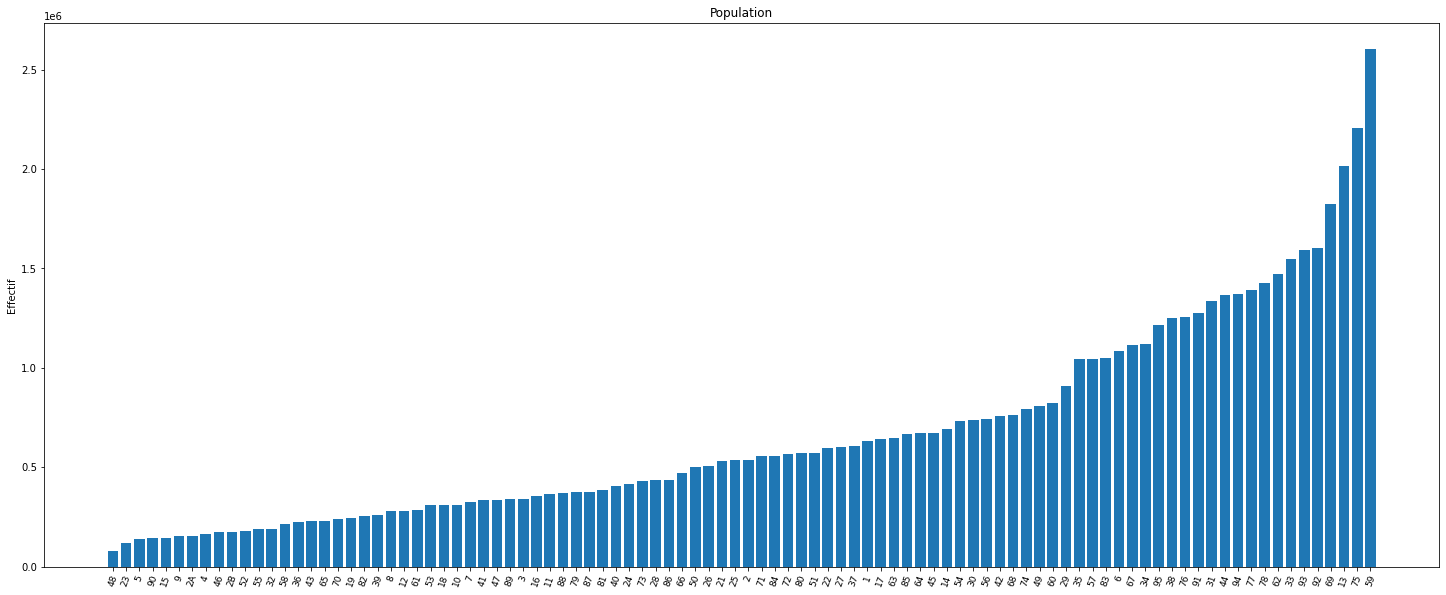

In [24]:
# Population par déparement

# dep = donnees["DEP"]
# eff = donnees["P15_POP"]
# dep = s_donnees["DEP"]
# eff = s_donnees["P15_POP"]
dep = s_departements["NUMÉRO"].map(str)
eff = s_departements["POPULATION"]

p1 = plt.bar(dep, eff)

plt.xticks(s_departements["NUMÉRO"].map(str), fontsize=9)
plt.ylabel('Effectif')
plt.title('Population')
plt.gcf().set_size_inches(25, 10)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=70)
plt.show()


In [25]:
pop2015 = depart_exag['POPULATION']

In [26]:
pop2015.describe()

count    9.600000e+01
mean     6.698002e+05
std      5.112656e+05
min      7.630900e+04
25%      3.026095e+05
50%      5.378090e+05
75%      8.431130e+05
max      2.605238e+06
Name: POPULATION, dtype: float64

In [27]:
### Écart type relatif
pop2015.std() / pop2015.mean()

0.7633105192524942

In [28]:
### étendue
print(pop2015.max()-pop2015.min())
### écart interquartile
pop2015.quantile(0.75) - pop2015.quantile(0.25)

2528929.0


540503.5

<AxesSubplot:>

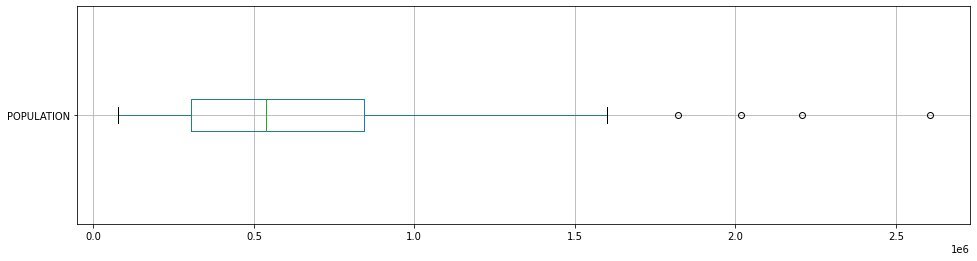

In [29]:
depart_exag.boxplot(column=['POPULATION'], vert=False, figsize=(16,4))